# Problema 3

Considere  el  conjunto  de  datos  ‘data_gapminder_experiment.csv’,  en  el  que  se  encuentra  informacion socio-demografica de diferentes paises para el año 2015. Aplique una estrategia de metodos jerarquicos, K means y DBScan para agrupación de paises. Analice los resultados y determine que estrategia es la más adecuada para el problema en estudio. Considere:

• Interpretacion/Analisis de clusters. ¿Qué podrian significar los clusters? 

• Grupos pertinentes a encontrar 

• Representación visual de los grupos utilizando estrategias reducción de dimensionalidad. 
¿Al utilizar componentes principales, qué interpretación pueden  tener  los primeros dos 
componentes? 

• Metrica adecuada de validacion de la composicion de los clusters 

• Analisis de los resultados

## Importando Liberías

In [93]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import pairwise_distances, silhouette_samples, davies_bouldin_score, silhouette_score,pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns
import dbcv
import geopandas as gpd
import folium
from folium import plugins

## Leyenedo y comprendiendo los datos

In [94]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
print("Shape of df ",df.shape)
print("\nDataTypes\n",df.dtypes)
df.head()

Shape of df  (168, 13)

DataTypes
 country                                                  object
Date                                                      int64
children_and_elderly_per_100_adults                      object
children_per_woman_total_fertility                       object
child_mortality_0_5_year_olds_dying_per_1000_born        object
gdp_per_capita_yearly_growth                             object
income_per_person_gdppercapita_ppp_inflation_adjusted     int64
life_expectancy_years                                    object
mean_years_in_school_men_25_to_34_years                  object
mean_years_in_school_women_25_to_34_years                object
population_density_per_square_km                         object
population_growth_annual_percent                         object
population_total                                          int64
dtype: object


,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,Afghanistan,2015,87,"4,8","73,2","2,11",1750,"57,9","4,13","0,98","51,7","2,94",33700000
1,Albania,2015,"44,8","1,71",14,"3,82",11000,"77,6",12,"12,3",107,"-0,291",2920000
2,Algeria,2015,"52,6","2,84","25,5","2,1",13700,"77,3","8,52","7,74","16,7","1,92",39900000
3,Angola,2015,"99,9","5,77","86,5","2,46",6230,64,"7,24","5,31","22,3","3,43",27900000
4,Antigua and Barbuda,2015,"45,6","2,06","8,7","1,9",20100,"77,2","13,2","14,5",227,"1,05",99900


Se identifica que las columnas con datos númericos (a excepción de `income_per_person_gdppercapita_ppp_inflation_adjusted` y `population_total`) están con tipo de datos inadecuados, debido a que los decimales están con "," y no con ".".

In [95]:
#Evaluando años de historia
df.Date.unique()

array([2015])

Se identifica que solo hay 1 año de historia, por lo que esta columna es irrelevante

In [96]:
# Revisando los países con datos
print(len(df.country.unique()))
df.country.unique()

168


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       "Cote d'Ivoire", 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israe

Es evidente que hay tantos países únicos como filas del DataFrame, por lo que se concluye que el DataFrame contiene datos socio-demográficos de un país para el 2015 por cada fila

## Preprocesando los Datos

In [97]:
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

print("\nDataTypes\n",df.dtypes)
df.head()


DataTypes
 country                                                   object
Date                                                       int64
children_and_elderly_per_100_adults                      float64
children_per_woman_total_fertility                       float64
child_mortality_0_5_year_olds_dying_per_1000_born        float64
gdp_per_capita_yearly_growth                             float64
income_per_person_gdppercapita_ppp_inflation_adjusted      int64
life_expectancy_years                                    float64
mean_years_in_school_men_25_to_34_years                  float64
mean_years_in_school_women_25_to_34_years                float64
population_density_per_square_km                         float64
population_growth_annual_percent                         float64
population_total                                           int64
dtype: object


,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,Afghanistan,2015,87.00,4.80,73.20,2.11,1750,57.90,4.13,0.98,51.70,2.94,33700000
1,Albania,2015,44.80,1.71,14.00,3.82,11000,77.60,12.00,12.30,107.00,-0.29,2920000
2,Algeria,2015,52.60,2.84,25.50,2.10,13700,77.30,8.52,7.74,16.70,1.92,39900000
3,Angola,2015,99.90,5.77,86.50,2.46,6230,64.00,7.24,5.31,22.30,3.43,27900000
4,Antigua and Barbuda,2015,45.60,2.06,8.70,1.90,20100,77.20,13.20,14.50,227.00,1.05,99900


In [98]:
# Borrando columnas irrelevantes
columns_to_drop = ['country', 'Date']
df_clustering = df.drop(columns=columns_to_drop)

print("Shape of df ",df_clustering.shape)
df_clustering.head()

Shape of df  (168, 11)


,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total
0,87.00,4.80,73.20,2.11,1750,57.90,4.13,0.98,51.70,2.94,33700000
1,44.80,1.71,14.00,3.82,11000,77.60,12.00,12.30,107.00,-0.29,2920000
2,52.60,2.84,25.50,2.10,13700,77.30,8.52,7.74,16.70,1.92,39900000
3,99.90,5.77,86.50,2.46,6230,64.00,7.24,5.31,22.30,3.43,27900000
4,45.60,2.06,8.70,1.90,20100,77.20,13.20,14.50,227.00,1.05,99900


In [99]:
# Estandarizando los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled.shape


(168, 11)

## Aplicando Métodos de Clusterización

### Clusterización Jerarquica

In [100]:
# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['agg_cluster'] = agg_cluster.fit_predict(df_scaled)

### Clusterización con K-means

In [101]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

### Clusterización DBScan

In [102]:
# DBScan clustering
dbscan = DBSCAN(eps=1.2, min_samples=7)
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)
df["dbscan_cluster"].replace({0:2,-1:0},inplace=True)

## Visualización de Resultados de Clusterizaciones

### Reducción de dimensionalidad con PCA

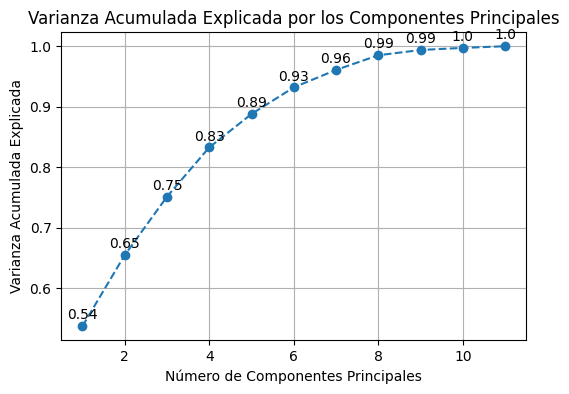

In [103]:
# Fit PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance with labels
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

# Add labels to each point
for i, txt in enumerate(cumulative_variance):
    plt.annotate(f'{round(txt, 2)}', (i + 1, txt), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Varianza Acumulada Explicada por los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()


**Se puede identificar que al rededor del 65% de la Varianza Total está representada por los 2 primeros Componentes Principales**

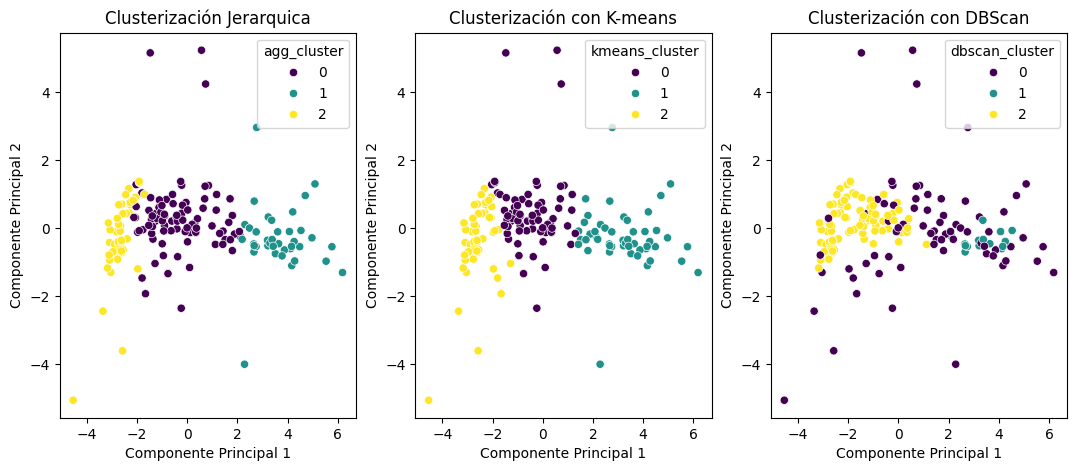

In [104]:
# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualización de la clusterización usando los dos primeros componentes principales de PCA
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['agg_cluster'], palette='viridis')
plt.title('Clusterización Jerarquica')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.subplot(1, 3, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('Clusterización con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['dbscan_cluster'], palette='viridis')
plt.title('Clusterización con DBScan')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.show()

## Evaluando la composición de los Clusters de cada modelo

Para esta evaluación de usarán los métodos: ***Matriz de Similitud***, ***Coeficiente de Silueta*** y ***Davies-Bouldin Index*** dado que los cluster son convexos de acuerdo a la visualización de los PCA

In [105]:
# Definiendo Funciones
def calculate_similarity_matrix(data, method='euclidean'):
    return pairwise_distances(data, metric=method)

def plot_similarity_matrix(matrix, title):
    plt.figure(figsize=(5, 3))
    sns.heatmap(matrix, cmap='viridis', annot=False)
    plt.title(title)
    plt.show()

def plot_silhouette_score(data, clusters, title):
    silhouette_avg = silhouette_score(data, clusters)
    sample_silhouette_values = silhouette_samples(data, clusters)

    plt.figure(figsize=(5, 3))
    y_lower = 10
    
    for i in range(max(clusters) + 1):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / max(clusters))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), color='red', fontweight='bold', verticalalignment='center')

        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f'{title} - Coeficiente de Silueta: {silhouette_avg}')
    plt.xlabel('Valores del Coeficiente de Silueta')
    plt.ylabel('Etiqueta del Cluster')
    plt.show()

def calculate_davies_bouldin_index(data, clusters):
    return davies_bouldin_score(data, clusters)

### Evaluando Matriz de Similitud

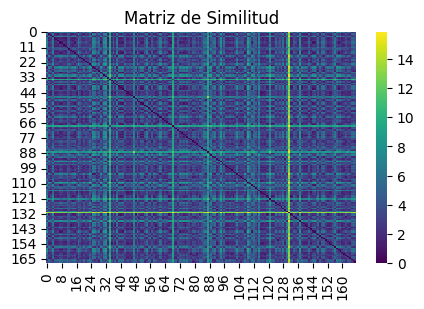

In [106]:
agg_similarity_matrix = calculate_similarity_matrix(df_scaled, method='euclidean')
plot_similarity_matrix(agg_similarity_matrix, 'Matriz de Similitud')

**Al analizar la Matriz de Similitud de los datos, no se pueden encontrar a simple vista los clusters generados por los métodos de agrupación**

### Coeficiente de Silueta

Los valores más cercanos a 1 indican una mejor partición.

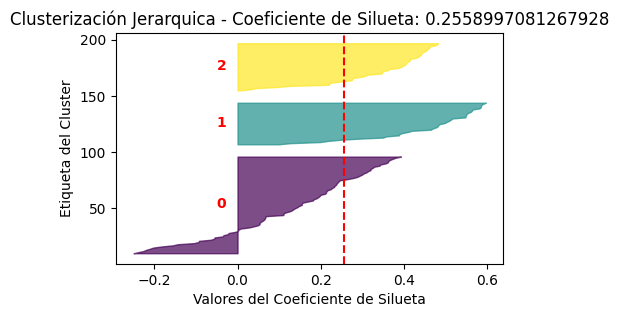

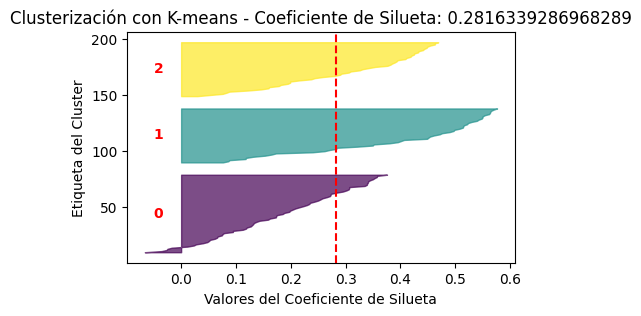

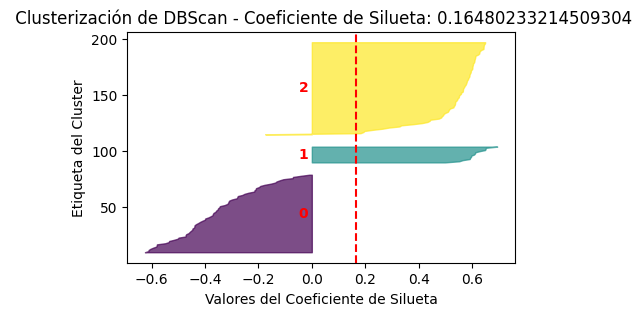

In [107]:
plot_silhouette_score(df_scaled, df['agg_cluster'], 'Clusterización Jerarquica')
plot_silhouette_score(df_scaled, df['kmeans_cluster'], 'Clusterización con K-means')
plot_silhouette_score(df_scaled, df['dbscan_cluster'], ' Clusterización de DBScan')


**Se puede concluir que:**

-La Clusterización de BDScan se debe descartar porque hay una silueta negativa.

-La mejor Clusterización es realizada por el modelo de K-Means

### Davies-Bouldin Index

Los valores más cercanos a cero indican una mejor partición.

In [108]:
# Hierarchical Clustering
agg_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df['agg_cluster'])
print(f"Hierarchical Clustering Davies-Bouldin Index: {agg_davies_bouldin}")

# K-means Clustering
kmeans_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df['kmeans_cluster'])
print(f"K-means Clustering Davies-Bouldin Index: {kmeans_davies_bouldin}")

# DBScan Clustering
dbscan_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df['dbscan_cluster'])
print(f"DBScan Clustering Davies-Bouldin Index: {dbscan_davies_bouldin}")

Hierarchical Clustering Davies-Bouldin Index: 1.2821044404346384
K-means Clustering Davies-Bouldin Index: 1.3386266401572458
DBScan Clustering Davies-Bouldin Index: 1.8531779560340595


**De acuerdo con el Índice de Davies-Bouldin**

Se puede concluir que los mejores modelos son los de Clusterización Jerarquica y de K-Means

#### En Conclusión, el método de BDScan no es viable para este caso, dado que es un método para datos con clusterización No Convexa y se puede identificar en las gráficas de los 2 primeros componentes principales, que la clusterización es Convexa.

### Density-Based Cluster Validation (DBCV)*

***NOTA:** Se aplica este método solo para experimentar cómo se utiliza. Sin embargo, se tiene claro que es un método para Clustering No convexo, y por lo tanto, no tiene sentido en este caso.

In [109]:
agg_score = dbcv.dbcv(df_scaled, df['agg_cluster'])
kmeans_score = dbcv.dbcv(df_scaled, df['kmeans_cluster'])
hdbscan_score = dbcv.dbcv(df_scaled, df['dbscan_cluster'])

print(f'DBCV Score para Clusterización Jerarquica {agg_score}')
print(f'DBCV Score para Clusterización con K-Means {kmeans_score}')
print(f'DBCV Score para Clusterización con DBScan {hdbscan_score}')

DBCV Score para Clusterización Jerarquica -0.8559984331973807
DBCV Score para Clusterización con K-Means -0.7425060762878016
DBCV Score para Clusterización con DBScan -0.1606617362226427


## Evaluando cuál es el mejor valor de K

Se decarta el modelo de BDScan para esta evaluación, porque es evidente que K-Means y Clustering Jerarquicos son mucho mejores para este caso.

#### Función para probar modelos con diferentes K

In [110]:
def probar_modelos(k):
    #Clusterización Jerarquica
    agg_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    df['agg_cluster'] = agg_cluster.fit_predict(df_scaled)

    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
    
   
    # Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Visualización de la clusterización usando los dos primeros componentes principales de PCA
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['agg_cluster'], palette='viridis')
    plt.title('Clusterización Jerarquica')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='viridis')
    plt.title('Clusterización con K-means')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    plt.show()

    plot_silhouette_score(df_scaled, df['agg_cluster'], 'Clusterización Jerarquica')
    plot_silhouette_score(df_scaled, df['kmeans_cluster'], 'Clusterización con K-means')

    # Hierarchical Clustering
    agg_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df['agg_cluster'])
    print(f"Hierarchical Clustering Davies-Bouldin Index: {agg_davies_bouldin}")
    
    # K-means Clustering
    kmeans_davies_bouldin = calculate_davies_bouldin_index(df_scaled, df['kmeans_cluster'])
    print(f"K-means Clustering Davies-Bouldin Index: {kmeans_davies_bouldin}")

#### **K=2**

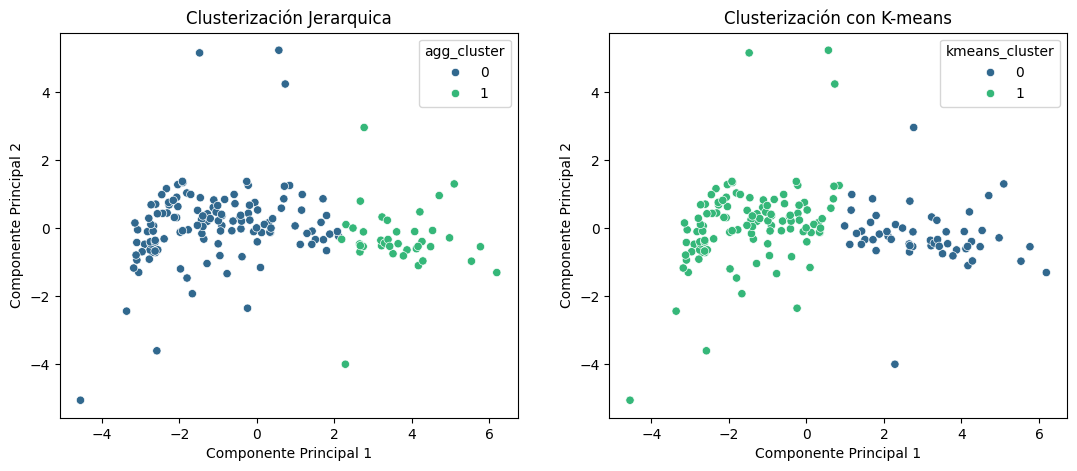

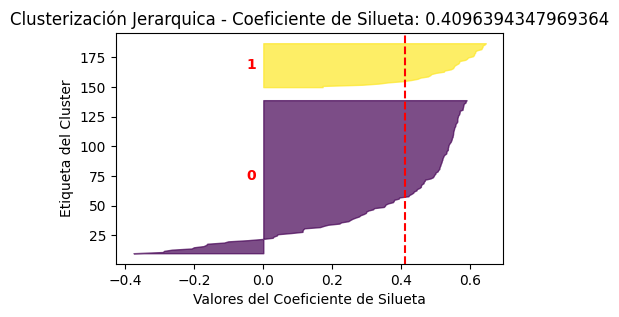

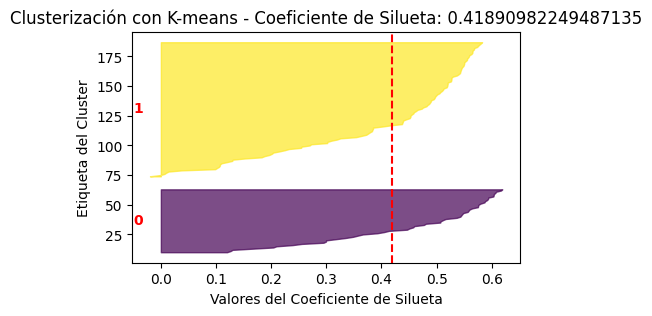

Hierarchical Clustering Davies-Bouldin Index: 0.8538569426574164
K-means Clustering Davies-Bouldin Index: 0.9116467845733178


In [111]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

probar_modelos(2)

#### **K=3**

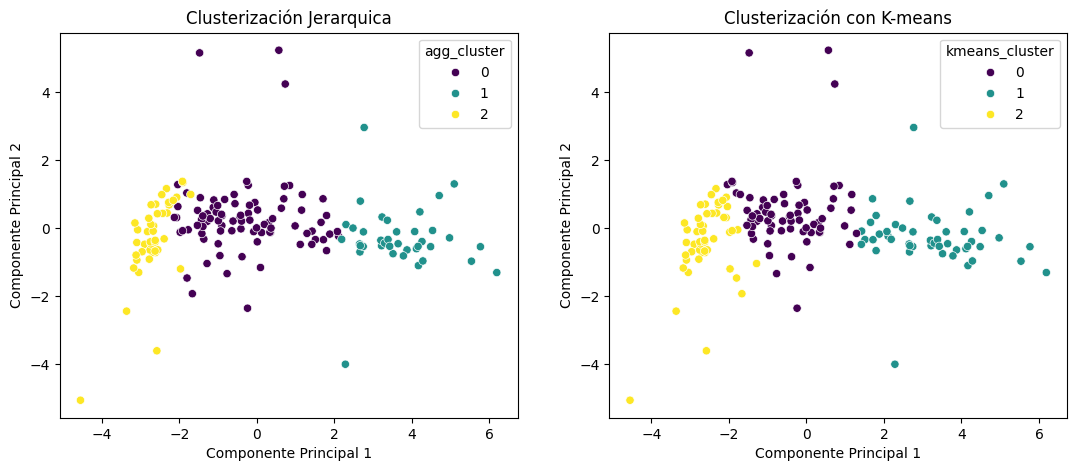

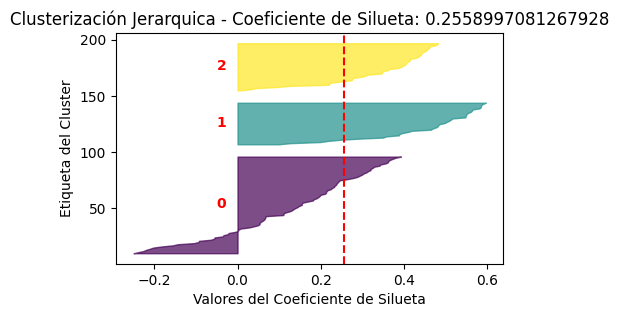

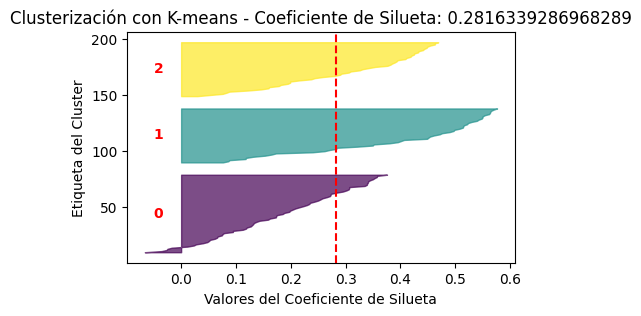

Hierarchical Clustering Davies-Bouldin Index: 1.2821044404346384
K-means Clustering Davies-Bouldin Index: 1.3386266401572458


In [112]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

probar_modelos(3)

#### **K=4**

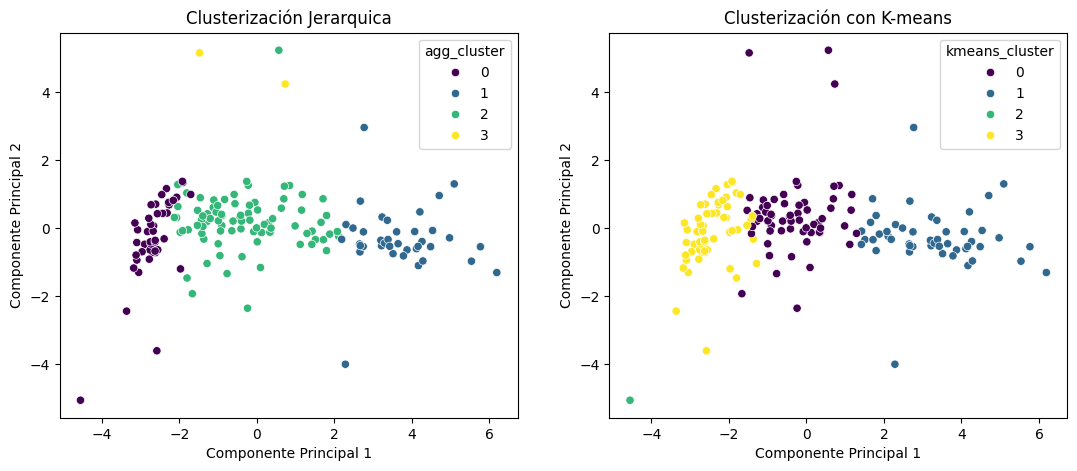

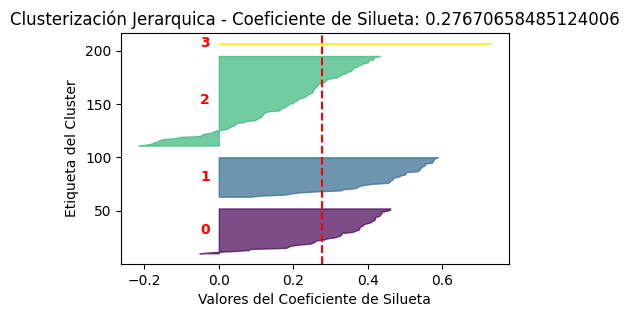

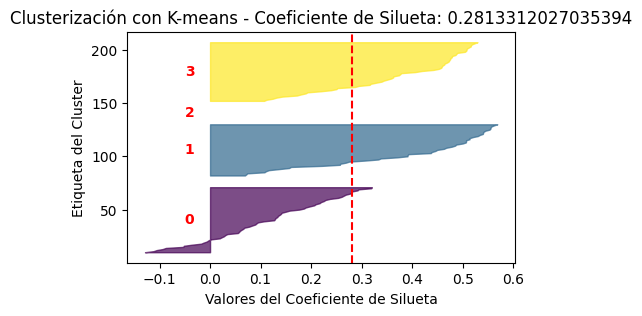

Hierarchical Clustering Davies-Bouldin Index: 1.0113769509323116
K-means Clustering Davies-Bouldin Index: 1.04626194902682


In [113]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)
probar_modelos(4)

### Conclusión selección de K:

**Se identifica que la mejor distribución es cuando el número de cluster (k) es igual a 2, dado que las métricas de evaluación del `coeficiente de silueta` e `Índice de Davies-Bouldin` dan mejores resultados que cuando K es igual a 3 o a 4.**

## Determinando la Estrategia más adecuada.

Para esto, se van a analizar los clusters generados por los modelos de `K-Means` y de `Clusterización Jerrquica` con **K=2**, para determinar cuál de los dos es la mejor opción para este caso.

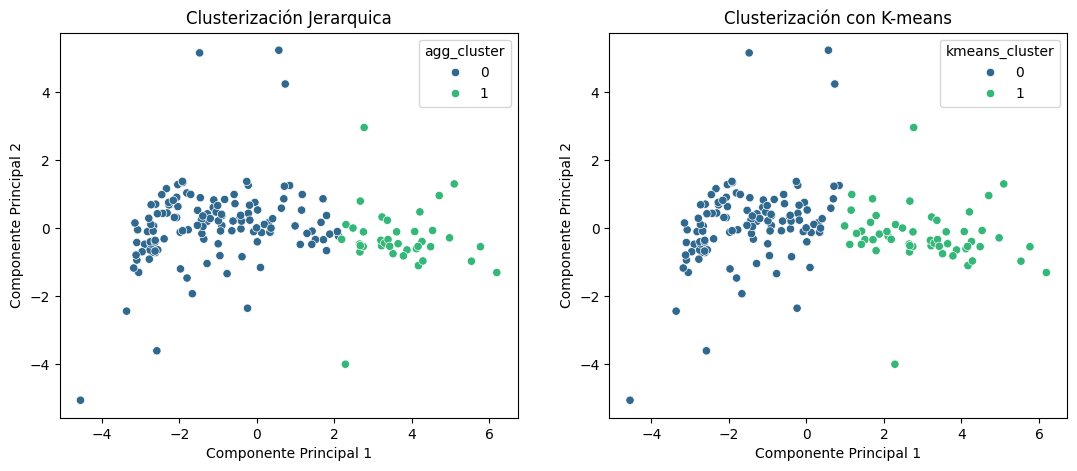

In [114]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

#cluster jeraquico
agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['agg_cluster'] = agg_cluster.fit_predict(df_scaled)
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
df['kmeans_cluster'].replace({1:0,0:1},inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
# Visualización de la clusterización usando los dos primeros componentes principales de PCA
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['agg_cluster'], palette='viridis')
plt.title('Clusterización Jerarquica')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('Clusterización con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


### Analizando Variables por cada Cluster

#### Analisis visual con Boxplots

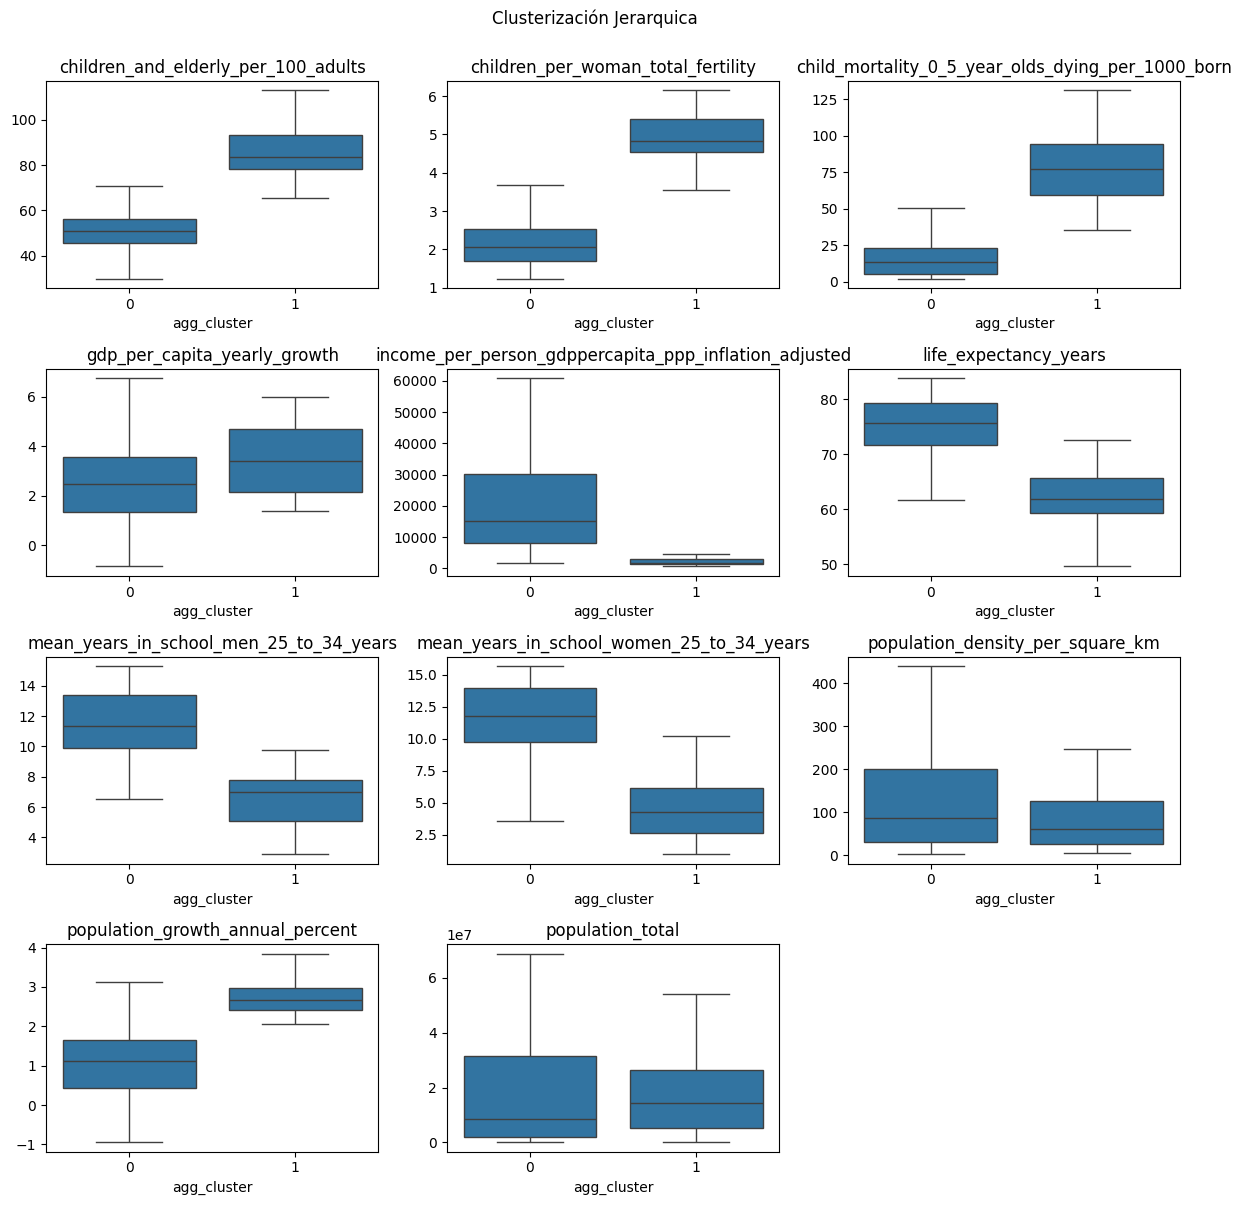

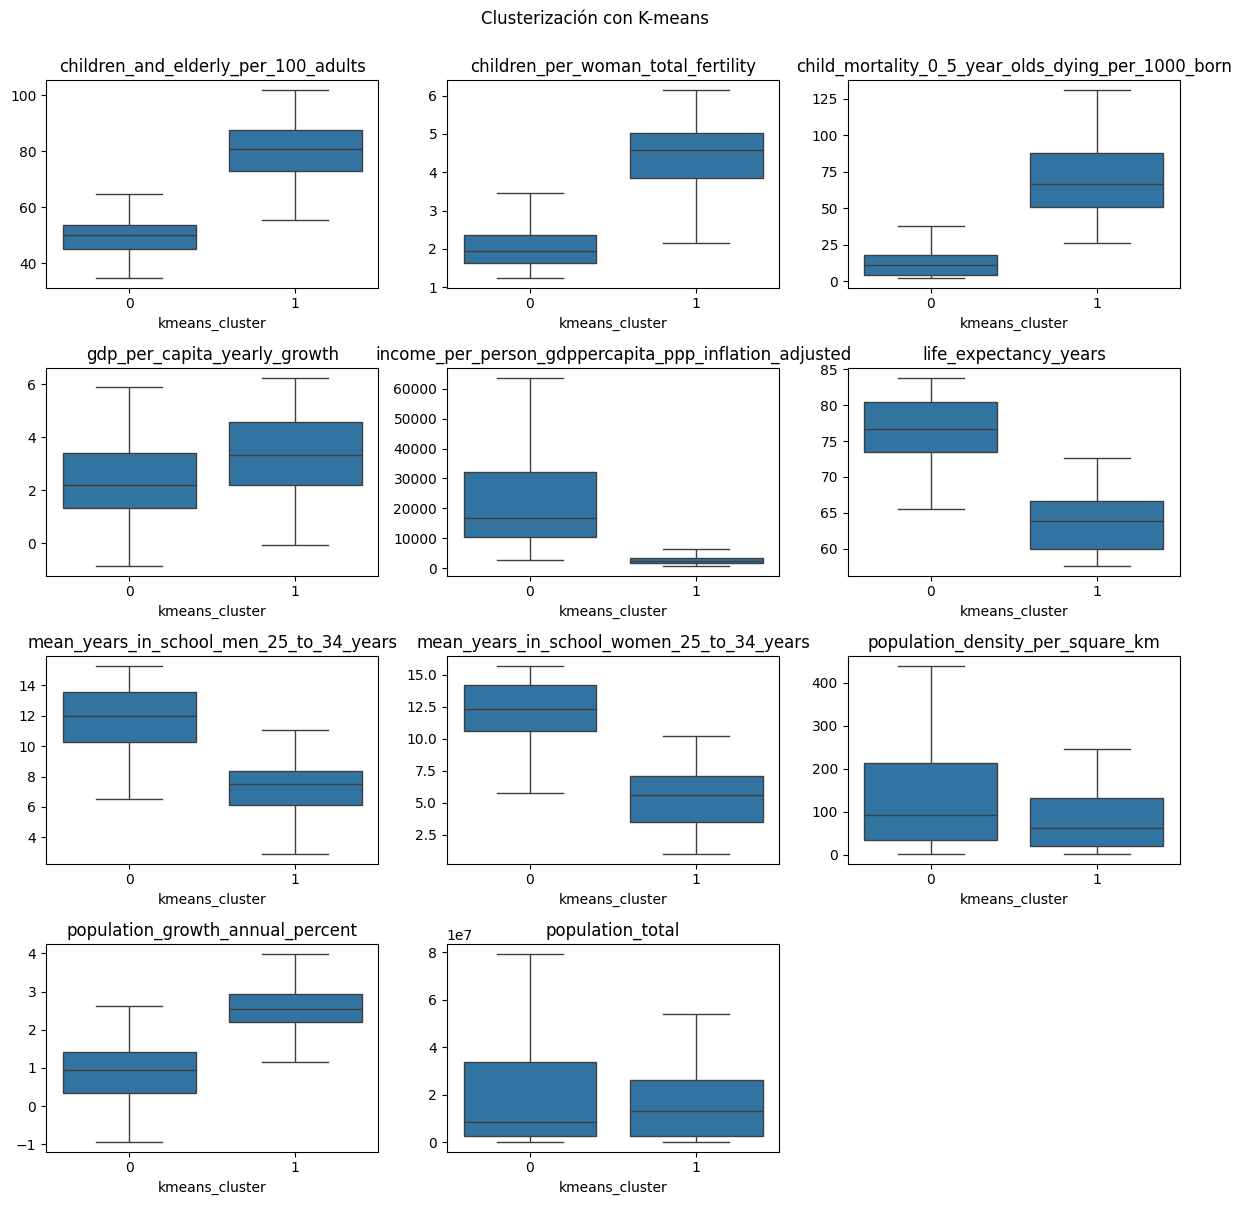

In [115]:
# Function to create boxplots for each numerical variable
def plot_boxplots(df, cluster_column, title):
    numerical_columns = df.select_dtypes(include=['float64',"int64"]).columns
    numerical_columns=numerical_columns.drop(["Date","agg_cluster"])

    plt.figure(figsize=(12, 12))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=cluster_column, y=column, data=df,showfliers=False)
        plt.title(f'{column}')
        plt.ylabel('')  # Remove y-axis label

    plt.suptitle(title, y=1)
    plt.tight_layout()
    plt.show()

# Create boxplots for each clustering method
plot_boxplots(df, 'agg_cluster', 'Clusterización Jerarquica')
plot_boxplots(df, 'kmeans_cluster', 'Clusterización con K-means')



##### Se puede evidenciar que la distribución de las variables, después de eliminar outliers, tienen diferencias significativas entre los cluster creados por cada uno de los modelos.

#### Valor promedio y mediano de las variables para cada Cluster

In [116]:
# Function to create a table with mean and median values for each variable and cluster
def create_mean_median_table(df, cluster_column, title):
    numerical_columns = df.select_dtypes(include=['float64',"int64"]).columns
    numerical_columns=numerical_columns.drop(["Date","agg_cluster"])

    # Create an empty DataFrame to store mean and median values
    summary_table = pd.DataFrame(index=numerical_columns)

    # Calculate mean and median for each variable and cluster
    for cluster_label in sorted(df[cluster_column].unique()):
        cluster_data = df[df[cluster_column] == cluster_label][numerical_columns]
        cluster_mean = cluster_data.mean()
        cluster_median = cluster_data.median()

        summary_table[f'{cluster_column}_{cluster_label}_mean'] = cluster_mean
        summary_table[f'{cluster_column}_{cluster_label}_median'] = cluster_median

    # Set the float_format to avoid scientific notation
    pd.options.display.float_format = '{:.2f}'.format

    # Display the summary table
    display(summary_table)

# Create mean and median tables for each clustering method
create_mean_median_table(df, 'agg_cluster', 'Hierarchical Clustering')
create_mean_median_table(df, 'kmeans_cluster', 'K-means Clustering')

,agg_cluster_0_mean,agg_cluster_0_median,agg_cluster_1_mean,agg_cluster_1_median
children_and_elderly_per_100_adults,51.66,51.00,85.39,83.75
children_per_woman_total_fertility,2.20,2.05,4.91,4.82
child_mortality_0_5_year_olds_dying_per_1000_born,18.03,13.85,79.02,76.90
gdp_per_capita_yearly_growth,2.80,2.49,3.79,3.40
income_per_person_gdppercapita_ppp_inflation_adjusted,21818.54,15250.00,2908.87,1865.00
life_expectancy_years,74.98,75.60,62.33,61.85
mean_years_in_school_men_25_to_34_years,11.45,11.35,6.52,7.02
mean_years_in_school_women_25_to_34_years,11.51,11.80,4.46,4.26
population_density_per_square_km,225.82,86.70,104.31,61.90
population_growth_annual_percent,1.13,1.11,2.68,2.67


,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median
children_and_elderly_per_100_adults,49.37,50.20,80.22,80.65
children_per_woman_total_fertility,2.04,1.95,4.45,4.58
child_mortality_0_5_year_olds_dying_per_1000_born,13.95,11.50,69.57,66.65
gdp_per_capita_yearly_growth,2.75,2.21,3.60,3.34
income_per_person_gdppercapita_ppp_inflation_adjusted,24043.07,16850.00,3815.50,2225.00
life_expectancy_years,76.32,76.70,63.26,63.85
mean_years_in_school_men_25_to_34_years,11.82,12.00,7.20,7.51
mean_years_in_school_women_25_to_34_years,12.04,12.35,5.41,5.58
population_density_per_square_km,245.05,93.25,99.73,61.90
population_growth_annual_percent,1.01,0.95,2.49,2.54


**Es evidente que los clusters generados por cada método son similares, por lo tanto, se va a elegir el que tenga una mejor visualización del coeficiente de silueta para analizar los resultados**

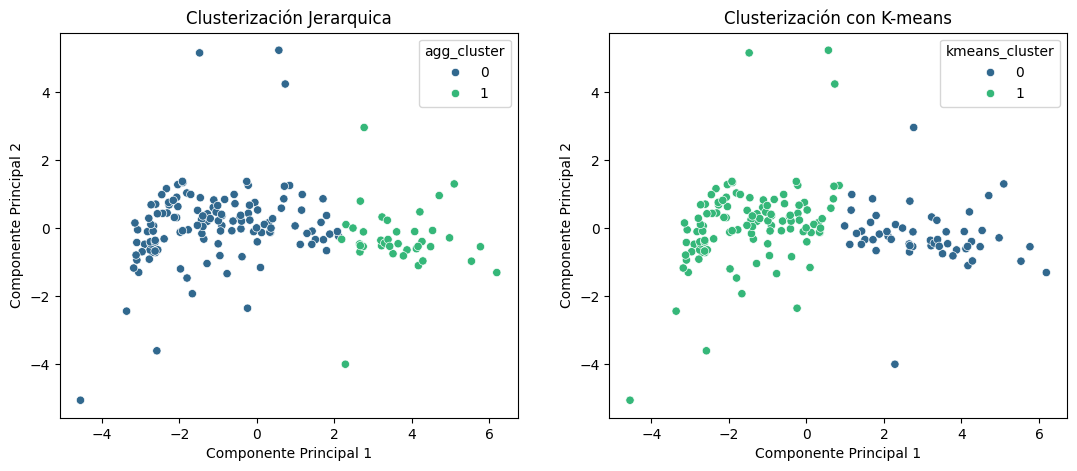

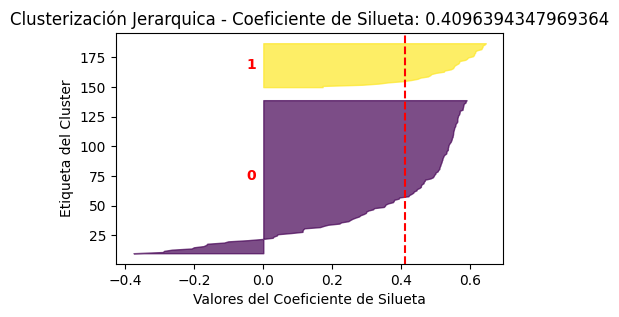

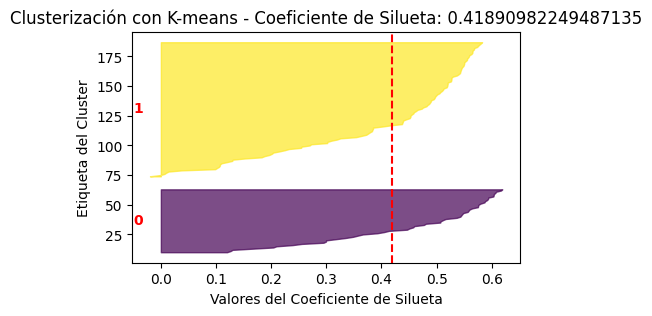

Hierarchical Clustering Davies-Bouldin Index: 0.8538569426574164
K-means Clustering Davies-Bouldin Index: 0.9116467845733178


In [117]:
df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

probar_modelos(2)

#### **Dado que la visualización del coeficiente de silueta del K-Means se mantienen en terreno positivo, se concluye que este es el mejor método de Clusterización para este caso**

## Análisis de la Clusterización Generada

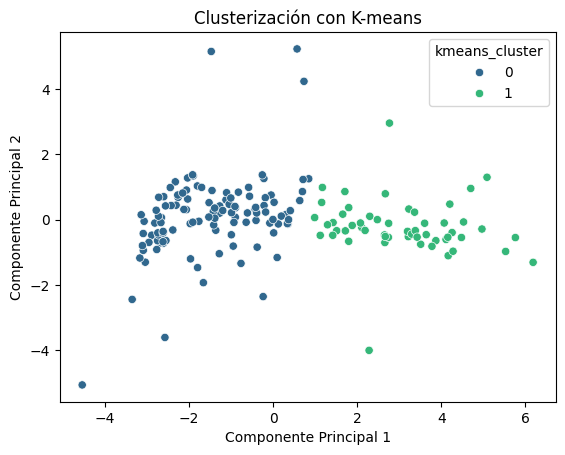

In [118]:
k=2

df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
df['kmeans_cluster'].replace({1:0,0:1},inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('Clusterización con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [119]:
numerical_columns = df.select_dtypes(include=['float64',"int64"]).columns
numerical_columns=numerical_columns.drop(["Date"])
# Create an empty DataFrame to store mean and median values
summary_table = pd.DataFrame(index=numerical_columns)
# Calculate mean and median for each variable and cluster
for cluster_label in sorted(df["kmeans_cluster"].unique()):
    cluster_data = df[df["kmeans_cluster"] == cluster_label][numerical_columns]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_mean'] = cluster_mean
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_median'] = cluster_median
# Set the float_format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Display the summary table
display(summary_table)

,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median
children_and_elderly_per_100_adults,49.37,50.20,80.22,80.65
children_per_woman_total_fertility,2.04,1.95,4.45,4.58
child_mortality_0_5_year_olds_dying_per_1000_born,13.95,11.50,69.57,66.65
gdp_per_capita_yearly_growth,2.75,2.21,3.60,3.34
income_per_person_gdppercapita_ppp_inflation_adjusted,24043.07,16850.00,3815.50,2225.00
life_expectancy_years,76.32,76.70,63.26,63.85
mean_years_in_school_men_25_to_34_years,11.82,12.00,7.20,7.51
mean_years_in_school_women_25_to_34_years,12.04,12.35,5.41,5.58
population_density_per_square_km,245.05,93.25,99.73,61.90
population_growth_annual_percent,1.01,0.95,2.49,2.54


##### Basado en los resultados de la clusterización, podemos definir los 2 grupos de países con características muy diferentes:


**Grupo 1**:

- Al rededor de 50 niños y ancianos por 100 adultos.
- Al rededor de 2 niños por mujer.
- Mueren en promedio 14 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 2,75 en promedio.
- Ingreso promedio por persona de 24.043
- Esperanza de vida promedio de 76 años.
- 12 Años de educación promedio en hombres entre 25 y 34 años.
- 12 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 93
- Crecimiento anual de la población promedio de 1%
- Población total promeido de 51.710.961

**Grupo 2**:

- Al rededor de 80 niños y ancianos por 100 adultos.
- Al rededor de 4.5 niños por mujer.
- Mueren en promedio 70 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,6 en promedio.
- Ingreso promedio por persona de 3.815
- Esperanza de vida promedio de 63 años.
- 7 Años de educación promedio en hombres entre 25 y 34 años.
- 5 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 62
- Crecimiento anual de la población promedio de 2.5%
- Población total promeido de 22.626.740

#### Analisis Geoespacial de los países con su respectivo cluster

Para esto se carga la librería de geopandas con el detalle de países y se trata de cruzar cada país con su respectivo indicativo para posteriormente gráficarlo.

In [120]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.dtypes)
world.head()

pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


/tmp/ipykernel_58660/3439834552.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.00,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.00,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [121]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world['name'].isin(df['country'])].reset_index(drop=True)
print(len(world_subset))
print(world_subset.dtypes)
world_subset.head()

139
pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
4,33580650.00,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


**Podemos identificar que de 168 países, 139 tienen un nombre que coincide perfectamente con los nombres de geopandas DataSet. Sin embargo, se tratará de cruzar de manera manual los que no coinciden exactamente**

In [122]:
#Países que no cruzaron
print("No cruzaron por el nombre ", len(list(df[df["country"].isin(world_subset["name"])==False]["country"])), " países")
list(df[df["country"].isin(world_subset["name"])==False]["country"])

No cruzaron por el nombre  29  países


['Antigua and Barbuda',
 'Bahrain',
 'Barbados',
 'Bosnia and Herzegovina',
 'Cape Verde',
 'Central African Republic',
 'Comoros',
 "Cote d'Ivoire",
 'Czech Republic',
 'Dominican Republic',
 'Equatorial Guinea',
 'Grenada',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Maldives',
 'Malta',
 'Mauritius',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Slovak Republic',
 'Solomon Islands',
 'South Sudan',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Tonga',
 'United States']

In [123]:
#Mapenado los códigos iso_a3 de los países que no cruzaron por nombre

list_of_codes=["ATG", #'Antigua and Barbuda'
               "BHR", #'Bahrain'
               "BRB", #'Barbados
               "BIH", #'Bosnia and Herzegovina'
               "CPV", #'Cape Verde
               "CAF", #'Central African Republic'
               "COM", #'Comoros'
               "CZE", #'Czech Republic'
               "DOM", #'Dominican Republic'
               "GNQ", #Equatorial Guinea
               "GRD", #'Grenada'
               "KIR", #Kiribati
               "LAO", #Lao
               "MDV", #Maldives
               "MLT", #Malta
               "MUS", #Mauritius
               "WSM", #Samoa
               "STP", #Sao Tome and Principe
               "SYC", #Seychelles
               "SGP", #Singapore
               "SVK", #Slovak Republic
               "SLB", #Solomon Islands
               "SSD", #South Sudan
               "LCA", #St. Lucia
               "VCT", #St. Vincent and the Grenadine
               "TON", #Tonga
               "USA", #United States
]

subset_world_2=world[world["iso_a3"].isin(list_of_codes)]
len(subset_world_2)

10

In [124]:
df=df.merge(world[["name","iso_a3"]],left_on="country",right_on="name",how="left").drop(columns="name")
df.loc[df["country"]=='United States',"iso_a3"]="USA"
df.loc[df["country"]=='Bosnia and Herzegovina',"iso_a3"]="BIH"
df.loc[df["country"]=='Dominican Republic',"iso_a3"]="DOM"
df.loc[df["country"]=='Central African Republic',"iso_a3"]="CAF"
df.loc[df["country"]=='Equatorial Guinea',"iso_a3"]="GNQ"
df.loc[df["country"]=='Lao',"iso_a3"]="LAO"
df.loc[df["country"]=='Solomon Islands',"iso_a3"]="SLB"
df.loc[df["country"]=='Slovak Republic',"iso_a3"]="SVK"
df.loc[df["country"]=='Czech Republic',"iso_a3"]="CZE"
df.loc[df["country"]=='South Sudan',"iso_a3"]="SSD"
df=df.dropna().reset_index(drop=True)
df.head()

,country,Date,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total,kmeans_cluster,iso_a3
0,Afghanistan,2015,87.00,4.80,73.20,2.11,1750,57.90,4.13,0.98,51.70,2.94,33700000,1,AFG
1,Albania,2015,44.80,1.71,14.00,3.82,11000,77.60,12.00,12.30,107.00,-0.29,2920000,0,ALB
2,Algeria,2015,52.60,2.84,25.50,2.10,13700,77.30,8.52,7.74,16.70,1.92,39900000,0,DZA
3,Angola,2015,99.90,5.77,86.50,2.46,6230,64.00,7.24,5.31,22.30,3.43,27900000,1,AGO
4,Argentina,2015,56.50,2.31,11.60,-0.13,19100,76.50,12.00,13.00,15.90,1.01,43400000,0,ARG


In [125]:
df.iso_a3.isna().value_counts()

False    149
Name: iso_a3, dtype: int64

In [126]:
print(f'No cruzaron {167-len(df)} paises')

No cruzaron 18 paises


In [127]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world['iso_a3'].isin(df['iso_a3'])].copy()
world_subset['kmeans_cluster'] = df['kmeans_cluster'].copy()
#world_subset.dropna()
print(world_subset.shape)
world_subset.head()

(149, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,kmeans_cluster
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.00
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.00
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.00
4,328239523.00,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.00
5,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.00


In [128]:
world_subset.iso_a3.isna().value_counts()

False    149
Name: iso_a3, dtype: int64

In [129]:
df_map=world.merge(df,on="iso_a3",how="left").dropna()
df_map.drop(columns=["Date","pop_est","gdp_md_est"],inplace=True)
df_map["kmeans_cluster"]=df_map["kmeans_cluster"].astype(int)
df_map["population_total"]=df_map["population_total"].astype(int)
print(df_map.dtypes)
df_map.head()


continent                                                  object
name                                                       object
iso_a3                                                     object
geometry                                                 geometry
country                                                    object
children_and_elderly_per_100_adults                       float64
children_per_woman_total_fertility                        float64
child_mortality_0_5_year_olds_dying_per_1000_born         float64
gdp_per_capita_yearly_growth                              float64
income_per_person_gdppercapita_ppp_inflation_adjusted     float64
life_expectancy_years                                     float64
mean_years_in_school_men_25_to_34_years                   float64
mean_years_in_school_women_25_to_34_years                 float64
population_density_per_square_km                          float64
population_growth_annual_percent                          float64
population

,continent,name,iso_a3,geometry,country,children_and_elderly_per_100_adults,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_per_capita_yearly_growth,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,mean_years_in_school_men_25_to_34_years,mean_years_in_school_women_25_to_34_years,population_density_per_square_km,population_growth_annual_percent,population_total,kmeans_cluster
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,52.80,2.54,22.50,1.80,8760.00,65.50,11.60,12.10,48.80,0.71,892000,0
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,93.80,5.08,58.80,3.88,2490.00,63.50,7.96,7.06,60.80,3.10,53900000,1
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,47.30,1.59,5.10,1.34,43000.00,81.70,15.30,15.70,3.95,0.83,35900000,0
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,50.90,1.93,6.60,2.15,52800.00,78.80,14.60,15.10,35.00,0.76,320000000,0
5,Asia,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,50.30,2.66,12.60,4.63,23500.00,71.60,13.40,13.90,6.57,1.46,17700000,0


In [130]:
import folium
from folium import plugins


# Assuming df contains the socio-demographic data with 'country', 'kmeans_cluster', and 'Geometry' columns

# Create a Folium map centered on the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer based on kmeans clusters
folium.Choropleth(
    geo_data=df_map[['country', 'kmeans_cluster', 'geometry']].to_json(),  # Use only relevant columns
    data=df_map,
    columns=['country', 'kmeans_cluster'],
    key_on='feature.properties.country',
    fill_color='YlGnBu',  # Choose a color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='K-means Clusters',
).add_to(world_map)

# Display the map
world_map



## Conclusión grupos pertinentes a encontrar

**De acuerdo a las métricas de evaluación de los modelos, se había definido que el número de clusters óptimo era k=2. Sin embargo, al análizar estos clusters geoespacialmente, se concluye que no tiene sentido meter en el mismo cluster a países latinoaméricanos con países europeos.**

**Por lo tanto, se reconsidera el número de grupos y se asigna nuevamente un número de clustes óptimo de k=3**

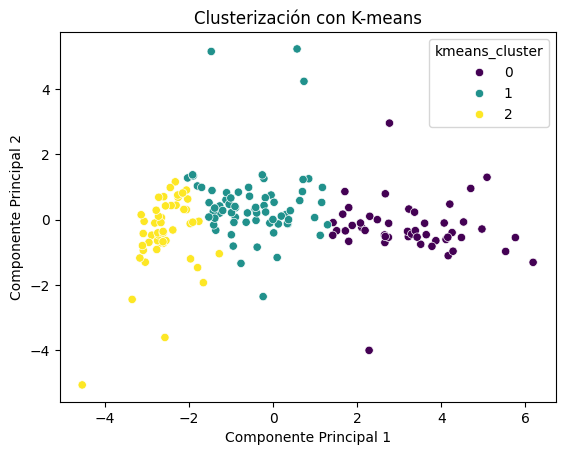

In [131]:
k=3

df=pd.read_csv("data_gapminder_experiment.csv",delimiter=";")
# Formateando Separador de Decimales y Tipo de Datos
columns_to_float=df.columns.drop(["country","Date","income_per_person_gdppercapita_ppp_inflation_adjusted",
                "population_total"])

for column in columns_to_float:
    df[column]=df[column].apply(lambda x: x.replace(",",".")).astype(float)

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
df['kmeans_cluster'].replace({1:0,0:1},inplace=True)


# Reducción de Dimensionalidad usando PCA y conservando solo los 2 primeros Componente Principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('Clusterización con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [132]:
numerical_columns = df.select_dtypes(include=['float64',"int64"]).columns
numerical_columns=numerical_columns.drop(["Date"])
# Create an empty DataFrame to store mean and median values
summary_table = pd.DataFrame(index=numerical_columns)
# Calculate mean and median for each variable and cluster
for cluster_label in sorted(df["kmeans_cluster"].unique()):
    cluster_data = df[df["kmeans_cluster"] == cluster_label][numerical_columns]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_mean'] = cluster_mean
    summary_table[f'{"kmeans_cluster"}_{cluster_label}_median'] = cluster_median
# Set the float_format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Display the summary table
display(summary_table)

,kmeans_cluster_0_mean,kmeans_cluster_0_median,kmeans_cluster_1_mean,kmeans_cluster_1_median,kmeans_cluster_2_mean,kmeans_cluster_2_median
children_and_elderly_per_100_adults,82.04,81.80,51.17,50.95,48.13,49.50
children_per_woman_total_fertility,4.62,4.65,2.34,2.31,1.69,1.68
child_mortality_0_5_year_olds_dying_per_1000_born,73.24,68.90,21.35,17.05,5.39,4.00
gdp_per_capita_yearly_growth,3.65,3.45,3.43,2.99,1.82,1.64
income_per_person_gdppercapita_ppp_inflation_adjusted,3570.35,2050.00,11478.57,10800.00,40173.47,34400.00
life_expectancy_years,62.81,63.50,73.64,74.25,79.27,80.70
mean_years_in_school_men_25_to_34_years,7.14,7.51,10.35,10.60,13.51,13.80
mean_years_in_school_women_25_to_34_years,5.28,5.31,10.29,10.85,14.01,14.40
population_density_per_square_km,100.41,60.80,160.23,79.05,350.70,108.00
population_growth_annual_percent,2.56,2.57,1.28,1.19,0.70,0.71


##### Basado en los resultados de la clusterización, podemos definir los 2 grupos de países con características muy diferentes:

**Grupo 0**:

- Al rededor de 48 niños y ancianos por 100 adultos.
- Al rededor de 1,7 niños por mujer.
- Mueren en promedio 5 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 1,82 en promedio.
- Ingreso promedio por persona de 40.173
- Esperanza de vida promedio de 79 años.
- 13,5 Años de educación promedio en hombres entre 25 y 34 años.
- 14 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 108
- Crecimiento anual de la población promedio de 0,7%
- Población total promeido de 26.689.957

**Grupo 1**:

- Al rededor de 51 niños y ancianos por 100 adultos.
- Al rededor de 2.3 niños por mujer.
- Mueren en promedio 21 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,43 en promedio.
- Ingreso promedio por persona de 11.478
- Esperanza de vida promedio de 74 años.
- 10 Años de educación promedio en hombres entre 25 y 34 años.
- 10 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 79
- Crecimiento anual de la población promedio de 1,28%
- Población total promedio de 66.431.667

**Grupo 2**:

- Al rededor de 82 niños y ancianos por 100 adultos.
- Al rededor de 4.6 niños por mujer.
- Mueren en promedio 73 niños entre 0 y años por cada 1000 nacidos.
- Crecimiento del PIB per capita anual de 3,6 en promedio.
- Ingreso promedio por persona de 3.570
- Esperanza de vida promedio de 63 años.
- 7 Años de educación promedio en hombres entre 25 y 34 años.
- 5 Años de educación promedio en mujeres entre 25 y 34 años.
- Densidad poblacional media de 60
- Crecimiento anual de la población promedio de 2.5%
- Población total promeido de 23.650.387

#### Analisis Geoespacial de los países con su respectivo cluster

Para esto se carga la librería de geopandas con el detalle de países y se trata de cruzar cada país con su respectivo indicativo para posteriormente gráficarlo.

In [133]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Filter world map to include only countries present in the DataFrame
world_subset = world[world['name'].isin(df['country'])].reset_index(drop=True)
print(len(world_subset))
print(world_subset.dtypes)
world_subset.head()

139
pop_est        float64
continent       object
name            object
iso_a3          object
gdp_md_est       int64
geometry      geometry
dtype: object


/tmp/ipykernel_58660/3319573039.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,18513930.00,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
4,33580650.00,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


**Podemos identificar que de 168 países, 139 tienen un nombre que coincide perfectamente con los nombres de geopandas DataSet. Sin embargo, se tratará de cruzar de manera manual los que no coinciden exactamente**

In [134]:
#Mapenado los códigos iso_a3 de los países que no cruzaron por nombre

list_of_codes=["ATG", #'Antigua and Barbuda'
               "BHR", #'Bahrain'
               "BRB", #'Barbados
               "BIH", #'Bosnia and Herzegovina'
               "CPV", #'Cape Verde
               "CAF", #'Central African Republic'
               "COM", #'Comoros'
               "CZE", #'Czech Republic'
               "DOM", #'Dominican Republic'
               "GNQ", #Equatorial Guinea
               "GRD", #'Grenada'
               "KIR", #Kiribati
               "LAO", #Lao
               "MDV", #Maldives
               "MLT", #Malta
               "MUS", #Mauritius
               "WSM", #Samoa
               "STP", #Sao Tome and Principe
               "SYC", #Seychelles
               "SGP", #Singapore
               "SVK", #Slovak Republic
               "SLB", #Solomon Islands
               "SSD", #South Sudan
               "LCA", #St. Lucia
               "VCT", #St. Vincent and the Grenadine
               "TON", #Tonga
               "USA", #United States
]

subset_world_2=world[world["iso_a3"].isin(list_of_codes)]
len(subset_world_2)

10

In [135]:
df=df.merge(world[["name","iso_a3"]],left_on="country",right_on="name",how="left").drop(columns="name")
df.loc[df["country"]=='United States',"iso_a3"]="USA"
df.loc[df["country"]=='Bosnia and Herzegovina',"iso_a3"]="BIH"
df.loc[df["country"]=='Dominican Republic',"iso_a3"]="DOM"
df.loc[df["country"]=='Central African Republic',"iso_a3"]="CAF"
df.loc[df["country"]=='Equatorial Guinea',"iso_a3"]="GNQ"
df.loc[df["country"]=='Lao',"iso_a3"]="LAO"
df.loc[df["country"]=='Solomon Islands',"iso_a3"]="SLB"
df.loc[df["country"]=='Slovak Republic',"iso_a3"]="SVK"
df.loc[df["country"]=='Czech Republic',"iso_a3"]="CZE"
df.loc[df["country"]=='South Sudan',"iso_a3"]="SSD"
df=df.dropna().reset_index(drop=True)


In [136]:
# Filter world map to include only countries present in the DataFrame
world_subset = world[world['iso_a3'].isin(df['iso_a3'])].copy()
world_subset['kmeans_cluster'] = df['kmeans_cluster'].copy()

In [137]:
df_map=world.merge(df,on="iso_a3",how="left").dropna()
df_map.drop(columns=["Date","pop_est","gdp_md_est"],inplace=True)
df_map["kmeans_cluster"]=df_map["kmeans_cluster"].astype(int)
df_map["population_total"]=df_map["population_total"].astype(int)

In [139]:

# Create a Folium map centered on the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer based on kmeans clusters
folium.Choropleth(
    geo_data=df_map[['country', 'kmeans_cluster', 'geometry']].to_json(),  # Use only relevant columns
    data=df_map,
    columns=['country', 'kmeans_cluster'],
    key_on='feature.properties.country',
    fill_color='YlGnBu',  # Choose a color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='K-means Clusters',
).add_to(world_map)

# Display the map
world_map

## Análisis de Resultados

Se concluye que hay una distribución mucho más coherente con un K=3, dado que se puede ver en el mapa que los países desarrollados tienen un cluster, los países en desarrollo tienen otro y finalmente hay un tercer cluster con los países más pobres.